## What is Deep Learning?

**Deep Learning** is a specialized sub-field of **Machine Learning (ML)**, which is itself a core discipline within **Artificial Intelligence (AI)**.
* **Artificial Intelligence (AI):** aims to enable computers to **automatically learn concepts** and solve problems that typically require human intelligence.
* **Machine Learning (ML):** focuses on enabling systems to learn these concepts **from data/examples** without being explicitly programmed for a specific task.
* **Deep Learning (DL):** a specific, powerful category of Machine Learning methods characterized by the use of **deep neural networks** (i.e., neural networks with multiple hidden layers) to model complex patterns.

## Core Learning Tasks in Machine Learning

In **Machine Learning (ML)**, the goal is to train an algorithm to perform a specific task by exposing it to a dataset of examples. Crucially, the algorithm must learn **generalizable patterns** from the data rather than simply memorizing the training examples.

We typically represent a single input example as a vector $\mathbf{x}$. In **supervised learning**, this input is paired with a desired output, or **label**, $\mathbf{y}$.

Below are several common types of learning tasks, categorized by the nature of their output and goal:

* **Classification**: The algorithm's objective is to predict a discrete label $\mathbf{y}$ from a set of $k$ possible classes.
    * **Binary Classification**: A specific case where $k=2$ (e.g., Yes/No, Spam/Not Spam).
    * **Multi-Output Classification**: The algorithm predicts multiple labels or tags for a single input example (e.g., classifying all objects present in an image).<br><br>

* **Regression**: The algorithm's objective is to predict one or multiple continuous, real-valued output $\mathbf{y}$ (e.g., predicting house prices or temperature).

* **Denoising**: The algorithm takes a corrupted or noisy input vector, $\tilde{\mathbf{x}}$, and is trained to produce the corresponding clean output vector, $\mathbf{x}$.

* **Auto-encoding (Representation Learning)**: The algorithm is trained to reconstruct its input $\mathbf{x}$ as its output $\hat{\mathbf{x}}$. The network is structurally constrained (usually by a bottleneck layer) to learn an efficient, compressed representation of the input. Failure to reproduce a specific input accurately can indicate that the input is an **outlier or anomaly** with respect to the training data distribution.

* **Density Estimation**: The algorithm aims to learn and output the **probability density function** $p(\mathbf{x})$ of the input vector $\mathbf{x}$. Essentially, the learning algorithm models the underlying, non-parametric probability distribution of the data.

* **Optimal Control / Reinforcement Learning (RL)**: The algorithm (known as an **Agent**) inputs a state $\mathbf{s}$ of a **dynamic system or environment** and must output an optimal action $\mathbf{a}$. This action is then applied to the environment, leading to a new state and a reward signal.

* **Generative Models**: The goal is to generate new data samples $\mathbf{x}_{\text{gen}}$ that belong to the same distribution $p(\mathbf{x})$ as the original training data. Examples include **Generative Adversarial Networks (GANs)** and **Diffusion Models**.

## Neural Networks: Core Architecture and Function

A **Neural Network** is fundamentally a sequence of connected computational units organized into **layers**. Each layer performs a transformation on its input to produce an output, which then serves as the input for the next layer.

We can denote the transformation performed by a single layer as a function $f$:
$$ \mathbf{z} = f(\mathbf{x}) $$

Here, $\mathbf{x}$ is the input (either the initial feature vector or the output from a preceding layer), and $\mathbf{z}$ is the layer's output.

In the common case of a **Dense** (or **Fully Connected**) layer, the function $f$ is an **affine transformation**:
$$ \mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b} $$

Where $\mathbf{W}$ is the **weight matrix** and $\mathbf{b}$ is the **bias vector**. These are the **trainable parameters** of the layer.

When layers are stacked, we are simply chaining these functions:
$$ \hat{\mathbf{y}} = f_N(f_{N-1}(\dots(f_1(\mathbf{x})))) $$

If all layers are purely linear (i.e., Dense layers without modification), chaining them together ultimately results in a single, large linear transformation. This means a purely linear network, no matter how deep, cannot learn complex, **non-linear decision boundaries** (like the XOR function).

To overcome this limitation and enable the network to model complex data, we introduce a **non-linear activation function** $g$ after the linear transformation of each layer.

The output from a layer followed by its activation function, $\mathbf{a}$, is:
$$ \mathbf{a} = g(\mathbf{z}) = g(\mathbf{W}\mathbf{x} + \mathbf{b}) $$

When layers are stacked with non-linearity, the final network output is:
$$ \hat{\mathbf{y}} = g_N(\mathbf{W}_N g_{N-1}(\mathbf{W}_{N-1} \dots g_1(\mathbf{W}_1\mathbf{x} + \mathbf{b}_1) \dots) + \mathbf{b}_N) $$

While there are many specialized network architectures (Convolutional, Recurrent, etc.), the general principle remains: we seek to **tune the weights ($\mathbf{W}$) and biases ($\mathbf{b}$)** of every layer. This optimization process, typically performed using an algorithm called **Backpropagation**, is what enables the network to learn the desired mapping from $\mathbf{x}$ to $\hat{\mathbf{y}}$.

## Loss Functions

A **Loss Function** (or **Objective Function**), usually denoted $L$, quantifies the discrepancy between the network's prediction $\hat{\mathbf{y}}$ and the true target value $\mathbf{y}$. It takes these two vectors as input and outputs a single **scalar value**.
$$ L(\mathbf{y}, \hat{\mathbf{y}}) \in \mathbb{R} $$

The fundamental goal of the learning algorithm is to **minimize** this loss function across the training dataset, effectively teaching the network to make predictions that are as close to the ground truth as possible.

Here are several widely used loss functions:

#### 1. Mean Squared Error (MSE) / $\ell_2$ Loss
$$ L(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
* **Primary Use:** **Regression** tasks where the output $\hat{y}$ is a continuous value.
* **Characteristics:** Penalizes large errors significantly more than small errors due to the squaring operation.<br><br>

#### 2. Cross-Entropy Loss (Log Loss)
For true label $y \in \{0, 1\}$ and predicted probability $\hat{p}$:
    $$ L(y, \hat{p}) = - [y \log(\hat{p}) + (1-y) \log(1-\hat{p})] $$
* **Primary Use:** The standard loss for **Classification** tasks, especially when estimating class probabilities.
* **Characteristics:** Highly penalizes confident but incorrect predictions. It measures the dissimilarity between the true probability distribution ($\mathbf{y}$) and the predicted distribution ($\hat{\mathbf{p}}$).<br><br>

#### 3. Poisson Loss
$$ L(y, \hat{y}) = \hat{y} - y \log(\hat{y}) $$
* **Primary Use:** Specialized **Regression** tasks where the target variable $\mathbf{y}$ represents **counts** (e.g., number of events, call arrivals). It assumes the underlying data follows a Poisson distribution.<br><br>


#### 4. Hinge Loss
$$ L(y, p) = \max(0, 1 - y p) $$
* **Primary Use:** Primarily used for training **Support Vector Machines (SVMs)**, but can be adapted for neural networks in classification tasks.
* **Characteristics:** Aims for a margin of separation. It only incurs a penalty if the prediction $p$ is on the wrong side of the margin (where $y \in \{-1, 1\}$).

### The Impact of Loss

The choice of loss function is critical as it dictates the network's learning priorities. For example, **Linear Regression** is a linear model optimized using the **Squared Loss**, while **Logistic Regression** is a linear model optimized using the **Cross-Entropy/Logistic Loss**. The model architecture remains simple, but the change in the optimization objective completely transforms the type of problem solved (regression vs. classification/probability estimation).

The Machine Learning community continually develops specialized loss functions, such as the **Focal Loss** for handling highly imbalanced datasets or those designed to support **importance weighting**.

## The Backpropagation Algorithm

The **Backpropagation** algorithm (short for "backward propagation of errors") is the fundamental method used to efficiently calculate the gradient of the loss function with respect to every weight and bias in a neural network. It relies entirely on the **Chain Rule** from calculus.

The chain rule allows us to calculate the derivative of a composite function. If we have a function $h$ defined as the composition of two functions, $g$ and $f$, applied to an input $\mathbf{x}$, such that $h(\mathbf{x}) = g(f(\mathbf{x}))$, then the derivative of $h$ with respect to $\mathbf{x}$ is:

$$\frac{\partial h}{\partial \mathbf{x}} = \frac{\partial g}{\partial f} \times \frac{\partial f}{\partial \mathbf{x}}$$

This principle is directly applicable to neural networks, which are nothing more than a long chain of composed functions (layers). To find out how a parameter deep within the network affects the final loss, we simply apply the chain rule across all intermediate layers.

To train the network, we must calculate the gradient of the **Loss Function** $L$ with respect to the network's trainable parameters, $\mathbf{W}$ (weights) and $\mathbf{b}$ (biases). Let's start with the parameters of the final layer, $N$: $\mathbf{W}^{(N)}$ and $\mathbf{b}^{(N)}$.

A single layer's computation involves three consecutive steps:

1.  **Linear Transformation:** $\mathbf{z}^{(N)} = \mathbf{W}^{(N)}\mathbf{a}^{(N-1)} + \mathbf{b}^{(N)}$ with $\mathbf{a}^{(N-1)}$ the output of the previous layer (after activation)
2.  **Activation:** $\mathbf{a}^{(N)} = g(\mathbf{z}^{(N)})$
3.  **Loss Calculation:** $L(\mathbf{y}, \mathbf{a}^{(N)})$

To find the gradient $\frac{\partial L}{\partial \mathbf{W}^{(N)}}$, we apply the chain rule across these three steps:

$$\frac{\partial L}{\partial \mathbf{W}^{(N)}} = \frac{\partial L}{\partial \mathbf{a}^{(N)}} \times \frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{z}^{(N)}} \times \frac{\partial \mathbf{z}^{(N)}}{\partial \mathbf{W}^{(N)}}$$

Similarly, the gradient calculation for the biases $\mathbf{b}$ follows the same chain rule structure. Since $\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$, the derivative of the linear output $\mathbf{z}$ with respect to the bias $\mathbf{b}$ is simply the identity matrix (or 1 in the scalar case). For the final layer bias $\mathbf{b}^{(N)}$:
$$\frac{\partial L}{\partial \mathbf{b}^{(N)}} = \frac{\partial L}{\partial \mathbf{a}^{(N)}} \times \frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{z}^{(N)}} \times \frac{\partial \mathbf{z}^{(N)}}{\partial \mathbf{b}^{(N)}} = \frac{\partial L}{\partial \mathbf{a}^{(N)}} \times \frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{z}^{(N)}} \times 1$$

#### Example: MSE Loss and Sigmoid Activation

Let's use the specific example of a single output unit with **Mean Squared Error (MSE) Loss** and a **Sigmoid Activation** function $g(\mathbf{z}) = \sigma(\mathbf{z}) = \frac{1}{1 + e^{-z}}$.

1.  Gradient of Loss w.r.t. activation output:
    $$\frac{\partial L}{\partial \mathbf{a}^{(N)}} = \frac{\partial (\mathbf{a}^{(N)} - y)^2}{\partial \mathbf{a}^{(N)}} = 2 \times (\mathbf{a}^{(N)} - y)$$
2.  Gradient of Activation w.r.t. linear output: (reminder: $\sigma'(x) = \sigma(x) (1 - \sigma(x))$)
    $$\frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{z}^{(N)}} = \frac{\partial \sigma(\mathbf{z}^{(N)})}{\partial \mathbf{z}^{(N)}} = \sigma(\mathbf{z}^{(N)}) (1 - \sigma(\mathbf{z}^{(N)}))$$
3.  Gradient of Linear Output w.r.t. weights: since $\mathbf{z} = \mathbf{W}\mathbf{x} + \mathbf{b}$, the derivative w.r.t. $\mathbf{W}$ is the input $\mathbf{x}$. In this case, the input to the last layer is $\mathbf{a}^{(N-1)}$:
    $$\frac{\partial \mathbf{z}^{(N)}}{\partial \mathbf{W}^{(N)}} = \frac{\partial \left(\mathbf{W}^{(N)}\mathbf{a}^{(N-1)} + \mathbf{b}^{(N)}\right)}{\partial \mathbf{W}^{(N)}} = \mathbf{a}^{(N-1)}$$

Combining these terms gives the full gradient for the last layer weights:

$$\frac{\partial L}{\partial \mathbf{W}^{(N)}} = 2 (\mathbf{a}^{(N)} - y) \times \sigma(\mathbf{z}^{(N)}) (1 - \sigma(\mathbf{z}^{(N)})) \times \mathbf{a}^{(N-1)}$$

Similarly for the biais gradient:
$$\frac{\partial L}{\partial \mathbf{b}^{(N)}} = 2 (\mathbf{a}^{(N)} - y) \times \sigma(\mathbf{z}^{(N)}) (1 - \sigma(\mathbf{z}^{(N)})) \times 1$$

### The Efficiency of Backward Propagation

Now consider the parameters of the layer $N-1$. The full chain rule for the gradient $\frac{\partial L}{\partial \mathbf{W}^{(N-1)}}$ is:

\begin{align}
\frac{\partial L}{\partial \mathbf{W}^{(N-1)}} &= \frac{\partial L}{\partial \mathbf{a}^{(N-1)}} \times \frac{\partial \mathbf{a}^{(N-1)}}{\partial \mathbf{z}^{(N-1)}} \times \frac{\partial \mathbf{z}^{(N-1)}}{\partial \mathbf{W}^{(N-1)}} \\
&= \left( \frac{\partial L}{\partial \mathbf{a}^{(N)}} \times \frac{\partial \mathbf{a}^{(N)}}{\partial \mathbf{z}^{(N)}} \times \frac{\partial \mathbf{z}^{(N)}}{\partial \mathbf{a}^{(N-1)}} \right) \times \frac{\partial \mathbf{a}^{(N-1)}}{\partial \mathbf{z}^{(N-1)}} \times \frac{\partial \mathbf{z}^{(N-1)}}{\partial \mathbf{W}^{(N-1)}}
\end{align}

The term in parentheses represents how the loss changes with respect to the output of the *previous* layer, $\mathbf{a}^{(N-1)}$.

**The Key Insight of Backpropagation:** When computing the gradient for layer $N-1$, we **reuse** the product of the derivatives already computed for the gradient of layer $N$. We simply need to calculate the *local* derivatives for layer $N-1$ and multiply them by the "error signal" $\frac{\partial L}{\partial \mathbf{a}^{(N-1)}}$ passed backward from layer $N$. This recursive and efficient structure is why the algorithm is named **Backpropagation**.

## Stochastic Gradient Descent (SGD)

**Stochastic Gradient Descent (SGD)** is the most fundamental optimization algorithm used to train neural networks. Its core purpose is to iteratively adjust the network's parameters (weights and biases) to minimize the overall loss function.

SGD differs from standard (Batch) Gradient Descent by computing the gradient and updating parameters based on a small subset of the data:

1.  **Gradient Calculation** (The "Stochastic" Step): For a randomly selected single data point or a small batch of observations $(\mathbf{x}_i, \mathbf{y}_i)$, the gradient $\nabla L(\mathbf{W})$ is computed. This gradient $\nabla_i$ represents an **approximation** of the true gradient over the entire dataset.
2.  **Parameter Update** (The "Descent" Step): An **optimizer** updates the current weights $\mathbf{W}_i$ to obtain the new weights $\mathbf{W}_{i+1}$ by moving in the direction opposite to the gradient.
3.  **Epochs:** A complete pass through the entire training dataset is called an **epoch**. Training typically involves multiple epochs to ensure convergence.

The general formulation for the weight update in SGD is:
$$\mathbf{W}_{i+1} \leftarrow \mathbf{W}_i - \alpha_i \nabla_i$$

where:
* $\mathbf{W}_i$ are the current parameters (weights and biases).
* $\nabla_i$ is the calculated gradient of the loss function $L$ with respect to the parameters $\mathbf{W}_i$.
* $\alpha_i$ is the **learning rate** (or step size) at iteration $i$.

The **learning rate ($\alpha_i$)** is a critical hyperparameter that determines the size of the steps taken toward the minimum. Choosing an appropriate learning rate is crucial for effective training, a topic we will address shortly.

<div class="alert alert-block alert-info">
    
<b> Exercise 0: </b>  
In your words comment the following code. Explain what is happening at each step.
</div>

In [1]:
import numpy as np
from sklearn import datasets, metrics, model_selection, preprocessing
from typing import Any


class ReLU:
    """Rectified Linear Unit (ReLU) activation function."""

    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        z = np.maximum(0, z)
        return z

    @staticmethod
    def gradient(z: np.ndarray) -> np.ndarray:
        z[z < 0] = 0
        z[z > 0] = 1
        return z


class Sigmoid:
    """Sigmoid ($\sigma$) activation function."""

    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def gradient(z: np.ndarray) -> np.ndarray:
        s = Sigmoid.activation(z)
        return s * (1 - s)


class Identity:
    """Identity activation function."""

    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return z

    @staticmethod
    def gradient(z: np.ndarray) -> np.ndarray:
        return np.ones_like(z)


class MSE:
    """Mean Squared Error (MSE) loss function."""

    @staticmethod
    def loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
        return np.mean((y_pred - y_true) ** 2)

    @staticmethod
    def gradient(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
        return 2 * (y_pred - y_true)


class SGD:
    """Stochastic Gradient Descent (SGD) optimizer."""

    def __init__(self, learning_rate: float):
        self.learning_rate = learning_rate

    def step(self, weights: np.ndarray, gradients: np.ndarray) -> None:
        weights -= self.learning_rate * gradients


class NN:
    """A simple fully-connected Neural Network model."""

    def __init__(self, dimensions: list[int], activations: list[Any], loss, optimizer):
        """
        Args:
            dimensions: List of layer sizes, e.g., [input_size, hidden_1, hidden_2, output_size].
            activations: List of activation classes for the hidden and output layers (length: len(dimensions)-1).
            loss: The loss function class (e.g., MSE).
            optimizer: The optimizer class instance (e.g., SGD).
        """
        self.n_layers = len(dimensions)
        self.loss = loss
        self.optimizer = optimizer
        
        self.w: dict[int, np.ndarray] = {}  # Weights W[i] connects layer i-1 to i
        self.b: dict[int, np.ndarray] = {}  # Biases B[i] for layer i
        self.activations: dict[int, Any] = {} # Activation for layer i

        # Initialize weights and biases
        for i in range(self.n_layers - 1):
            input_dim = dimensions[i]
            output_dim = dimensions[i + 1]
            self.w[i + 1] = np.random.randn(input_dim, output_dim) / np.sqrt(input_dim)
            self.b[i + 1] = np.zeros(output_dim)
            self.activations[i + 2] = activations[i] # Layer 2 is the first hidden layer

    def _feed_forward(self, X: np.ndarray) -> tuple[dict[int, np.ndarray], dict[int, np.ndarray]]:
        """
        Executes a forward pass through the neural network.

        Args:
            X: Input data batch of shape (batch_size, n_features).

        Returns:
            A tuple containing:
            - z: dict of linear outputs before activation {layer_idx: np.ndarray}.
            - a: dict of activation outputs {layer_idx: np.ndarray}. a[1] is the input X.
        """
        z: dict[int, np.ndarray] = {}
        a: dict[int, np.ndarray] = {1: X}  # a[1] holds the input X (activation of the input layer)

        # Iterate from the first hidden layer (i=2) up to the output layer (n_layers)
        for i in range(2, self.n_layers + 1):
            # Linear transformation: z = a_prev @ W + b
            z[i] = np.dot(a[i - 1], self.w[i - 1]) + self.b[i - 1]
            # Non-linear activation: a = g(z)
            a[i] = self.activations[i].activation(z[i])

        return z, a

    def _backprop(self, z: dict[int, np.ndarray], a: dict[int, np.ndarray], y_true: np.ndarray) -> None:
        """
        Performs the backpropagation step to compute and apply gradients.

        Args:
            z: Linear outputs from forward pass.
            a: Activation outputs from forward pass.
            y_true: Ground truth target values of shape (batch_size, n_targets).
        """

        # 1. Output Layer (Layer N = self.n_layers)
        y_pred = a[self.n_layers]
        final_activation = self.activations[self.n_layers]
        delta = self.loss.gradient(y_true, y_pred) * final_activation.gradient(z[self.n_layers])
        dw = np.dot(a[self.n_layers - 1].T, delta)
        update_params = {self.n_layers - 1: (dw, delta)}

        # 2. Hidden Layers (Backward pass from L-1 to 1)
        # i represents the index of the weight matrix W[i] and bias B[i]
        for i in range(self.n_layers - 2, 0, -1):
            # Propagate delta backward: delta_i = (delta_{i+1} @ W_{i+1}) * (da_i/dz_i)
            delta = np.dot(delta, self.w[i + 1].T) * self.activations[i + 1].gradient(z[i + 1])
            # dW_i = a_i @ delta_i
            dw = np.dot(a[i].T, delta)
            update_params[i] = (dw, delta)

        # 3. Parameter Update
        for k, (dw, delta) in update_params.items():
            # Update weights W[k]
            self.optimizer.step(weights=self.w[k], gradients=dw)
            # Update biases B[k]: gradient is the mean of delta over the batch
            self.optimizer.step(weights=self.b[k], gradients=np.mean(delta, axis=0))

    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int, print_every: float = np.inf) -> None:
        """
        Trains the neural network using mini-batch SGD.

        Args:
            X: Training features of shape (n_samples, n_features).
            y: Training targets of shape (n_samples, n_targets).
            epochs: Number of complete passes over the training data.
            batch_size: Number of samples per gradient update.
            print_every: Print training loss every this many epochs.
        """
        
        # Convention: y should be 2D
        if y.ndim == 1:
            y = np.expand_dims(y, axis=1)

        n_samples = X.shape[0]
        n_batches = n_samples // batch_size

        for i in range(epochs):
            # Shuffle the data indices for random mini-batches
            idx = np.arange(n_samples)
            np.random.shuffle(idx)
            x_shuffled = X[idx]
            y_shuffled = y[idx]

            # Iterate over mini-batches
            for j in range(n_batches):
                start = j * batch_size
                stop = (j + 1) * batch_size
                x_batch = x_shuffled[start:stop]
                y_batch = y_shuffled[start:stop]
                z, a = self._feed_forward(x_batch)
                self._backprop(z, a, y_batch)

            # Display performance
            if (i + 1) % print_every == 0:
                y_pred = self.predict(X)
                current_loss = self.loss.loss(y, y_pred)
                print(f'[Epoch {i+1}] train loss: {current_loss:.4f}')

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts an output for each sample in X.

        Args:
            X: Input data of shape (n_samples, n_features).

        Returns:
            Predicted output $\hat{y}$ of shape (n_samples, n_targets).
        """
        _, a = self._feed_forward(X)
        return a[self.n_layers]

## Input Normalization

When training a neural network using **Gradient Descent** (or any of its variants like SGD), the scale of the input features dramatically influences the optimization process and convergence speed.
The step size of the gradient update for a weight $\mathbf{W}_i$ is proportional to the corresponding input feature $\mathbf{x}_i$, as the weight gradient is calculated as:
$$\frac{\partial L}{\partial \mathbf{W}} \propto \mathbf{x}_{\text{prev}}$$

If feature magnitudes vary greatly (e.g., feature 1 ranges from 0 to 1, while feature 2 ranges from 1 to 1,000,000), the optimizer will struggle:
* Features with **large magnitudes** will dominate the gradients, leading to very large steps and potentially causing the optimization to **overshoot or diverge**.
* The optimization landscape will be highly elliptical (stretched), requiring a tiny learning rate to prevent divergence, which significantly **slows down convergence**.

**Thus, it is strongly recommended to always scale your input data.**

The most common and effective technique is **standardization**, which transforms the data such that each feature has a **mean of 0** and a **standard deviation of 1**:

$$ \mathbf{x}' = \frac{\mathbf{x} - \mu}{\sigma} $$

This ensures that the weights for all features are updated on a similar scale, leading to a more circular optimization landscape and faster, more stable convergence.

You can typically achieve this transformation using utility functions like scikit-learn's `scale` function from the `preprocessing` module.

# California housing dataset

In [2]:
np.random.seed(1)
housing = datasets.fetch_california_housing()
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:
X = housing["data"]
y = housing["target"]

X = preprocessing.scale(X)

# Split into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=.3,
    shuffle=True,
    random_state=42
)

nn = NN(
    dimensions=(8, 10, 1),
    activations=(ReLU, Identity),
    loss=MSE,
    optimizer=SGD(learning_rate=1e-3)
)
nn.fit(X_train, y_train, epochs=50, batch_size=8, print_every=10)

y_pred = nn.predict(X_test)

print(metrics.mean_absolute_error(y_test, y_pred))

[Epoch 10] train loss: 0.4018
[Epoch 20] train loss: 0.3657
[Epoch 30] train loss: 0.3560
[Epoch 40] train loss: 0.3478
[Epoch 50] train loss: 0.3596
0.42974521099693364


# Digit prediction

In [4]:
np.random.seed(1)
X, y = datasets.load_digits(return_X_y=True)

# One-hot encode y
y = np.eye(10)[y]

In [5]:
# Split into train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=.3,
    shuffle=True,
    random_state=42
)

nn = NN(
    dimensions=(64, 15, 10),
    activations=(ReLU, Sigmoid),
    loss=MSE,
    optimizer=SGD(learning_rate=1e-3)
)
nn.fit(X_train, y_train, epochs=500, batch_size=16, print_every=100)

y_pred = nn.predict(X_test)
print(metrics.classification_report(y_test.argmax(1), y_pred.argmax(1)))

[Epoch 100] train loss: 0.0221
[Epoch 200] train loss: 0.0206
[Epoch 300] train loss: 0.0204
[Epoch 400] train loss: 0.0203
[Epoch 500] train loss: 0.0203
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.75      0.98      0.85        50
           2       0.00      0.00      0.00        47
           3       0.57      0.96      0.71        54
           4       0.88      1.00      0.94        60
           5       0.00      0.00      0.00        66
           6       0.91      0.98      0.95        53
           7       0.92      0.98      0.95        55
           8       0.59      0.98      0.74        43
           9       0.77      0.95      0.85        59

    accuracy                           0.77       540
   macro avg       0.63      0.78      0.69       540
weighted avg       0.63      0.77      0.69       540



/home/valentin/.local/venvs/jup/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/valentin/.local/venvs/jup/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/valentin/.local/venvs/jup/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

# Deep learning framework : Pytorch

[Pytorch](https://pytorch.org/) is a deep learning framework allowing to automate many operations.
It also provides a lot of tools to create and train deep learning models.

In deep learning, the type of data used is the **Tensor**, which are equivalent to numpy **ndarray**.
A tensor is an array of data that can contain vectors, images and much more!

You can instantiate a tensor using the `torch.tensor` method.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.0: </b>
* Create a tensor `age_1` containing your age with type `long` and a tensor `size_1` containing your height in cm with type `float32`.
</div>

In [6]:
import torch

age_1 = torch.tensor(30, dtype=torch.long)
size_1 = torch.tensor(180.5, dtype=torch.float32)

print(f"age_1: {age_1}, dtype: {age_1.dtype}")
print(f"size_1: {size_1}, dtype: {size_1.dtype}")

age_1: 30, dtype: torch.int64
size_1: 180.5, dtype: torch.float32


<div class="alert alert-block alert-info">
    
<b> Exercise 1.1: </b>  
Imagine your task is to predict the life expectancy of a person $y_i$ from a set of biological measure $(x_i^0,x_i^1,x_i^2,\ldots,x_i^6)$.
* Create three tensors `x_1`, `x_2` and `x_3` of biological data and form a data batch of size 3 `batch_x` with these three tensors.

**Tip**: Use `torch.stack` (cf. [documentation](https://docs.pytorch.org/docs/stable/generated/torch.stack.html)).
</div>

In [7]:
x1 = torch.tensor([75.0, 1.2, 0.5, 30.0], dtype=torch.float32)
x2 = torch.tensor([82.1, 1.5, 0.4, 25.5], dtype=torch.float32)
x3 = torch.tensor([68.5, 1.0, 0.6, 35.0], dtype=torch.float32)
batch_x = torch.stack([x1, x2, x3])

print(f"x1 shape: {x1.shape}")
print(f"batch_x shape: {batch_x.shape}")

x1 shape: torch.Size([4])
batch_x shape: torch.Size([3, 4])


You can also check some attributes of your tensor.
For example you can look at the shape of the tensor using the `shape` attribute, the gradient of a tensor using the `grad` attribute and the type using `dtype`.

You can also see under which device your tensor is with the attribute `device`.
Finally you can also put your data on gpu using the `torch.tensor.to` method.
The possible devices are "cpu" and "cuda".

<div class="alert alert-block alert-info">
    
<b> Exercise 1.2: </b>  
* Look at the device, gradient, type and shape of your tensors.
* Change the device of your tensors to "cuda".
</div>

<div class="alert alert-block alert-warning">

CUDA is Nvidia's library to talk with GPUs for accelerated parallel computing. If you don't have a Nvidia GPU on your computer, you will not be able to change the device of your tensors and all the neural network computation will be done on CPU, which is way slower.

As we only work with tiny network in these notebooks, this will not be perceptible but when tackling real world problems, using GPU is a must-have in Deep Learning.
</div>

In [8]:
print("--- Properties of batch_x ---")
print(f"Device: {batch_x.device}")
print(f"Type (dtype): {batch_x.dtype}")
print(f"Shape: {batch_x.shape}")
print(f"Requires gradient: {batch_x.requires_grad}")

# Only if we have a Nvidia GPU
# batch_x = batch_x.to('cuda')
# print(f"New Device: {batch_x.device}")

--- Properties of batch_x ---
Device: cpu
Type (dtype): torch.float32
Shape: torch.Size([3, 4])
Requires gradient: False


**Now we will use the California housing dataset once again.** 

To manage more easily the processing of your data, pytorch proposes a tool: the `Dataset` class.

This class allows the creation of a data generator which will be very useful when training your model.

This dataset allows to retrieve the data as a tensor.
The dataset implements 2 methods : The `__get_item__` method which allows to access to a sample and the `__len__` method which returns the number of sample.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.4: </b>  
Implement a torch dataset allowing you to access the boston dataset.
* The `__get_item__` method should return a dict containing the data and labels at a given index in tensor form.
* The `__len__` method should return the number of samples.

</div>

In [9]:
from torch.utils.data import Dataset

In [10]:
class TabularDataset(Dataset):
    """A PyTorch Dataset class for loading tabular data (features X and labels y)."""
    
    def __init__(self, X: torch.Tensor, y: torch.Tensor):
        self.X = X
        self.y = y
        
    def __getitem__(self, idx: int) -> dict[str, torch.Tensor]:
        return {"data": self.X[idx], "label": self.y[idx]}

    def __len__(self) -> int:
        return self.X.shape[0]

<div class="alert alert-block alert-info">
    
<b> Exercise 1.5: </b>  
Set up a dataset for the train set and one for the validation set.
</div>

In [11]:
housing = datasets.fetch_california_housing()
X_raw, y_raw = housing.data, housing.target

scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_raw, dtype=torch.float32).unsqueeze(1) # unsqueeze(1) makes it (N, 1)

# Split the data into training and validation sets
# We use an 80/20 split (common practice)
X_train, X_val, y_train, y_val = model_selection.train_test_split(
    X_tensor.numpy(),
    y_tensor.numpy(),
    test_size=0.2,
    random_state=42
)

# Convert split NumPy arrays back to PyTorch Tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
X_val_t = torch.tensor(X_val, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
y_val_t = torch.tensor(y_val, dtype=torch.float32)


train_dataset = TabularDataset(X_train_t, y_train_t)
val_dataset = TabularDataset(X_val_t, y_val_t)

In [12]:
print(f"First sample (x,y) of the dataset : {train_dataset[0]} \n") # get_item method
print(f"There are {len(train_dataset)} samples in the dataset.") # len method
print(f"There are {len(val_dataset)} samples in the validation dataset.")

First sample (x,y) of the dataset : {'data': tensor([-0.3217,  0.3465, -0.1663, -0.1905,  0.7723,  0.0598, -1.3680,  1.2676]), 'label': tensor([1.0300])} 

There are 16512 samples in the dataset.
There are 4128 samples in the validation dataset.


Once the dataset is created, another class is used to wrap this dataset: The `Dataloader`.
A dataloader allows for easily sampling batches of data and parallelizating the batch formation on several workers.

## Mini-batching

At each iteration $i$, instead of updating the weights $w_i$ by using the gradient $g_i$, we can accumulate the gradients and only update the weights every $k$ iterations.

The gradient we will use to update the weights will thus be the average of the past $k$ gradients. This is called **mini-batch gradient descent**. Stochastic gradient descent can be seen as a special case of mini-batch gradient descent when the batch size is set to 1.

![mini-batch](mini-batch.png)

The batch size is important. Small batch size work well because they are a form of regularization.

Here are some links if you want to get some intuitions:

- [Tradeoff batch size vs. number of iterations to train a neural network - Cross Validated](https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network)
- [What is batch size in neural network? - Cross Validated](https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network)
- [In deep learning, why don't we use the whole training set to compute the gradient? - Quora](https://www.quora.com/In-deep-learning-why-dont-we-use-the-whole-training-set-to-compute-the-gradient)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.6: </b>  
Create a train dataloader and a validation dataloader that returns sample batches of size 16.

</div>

In [13]:
from torch.utils.data import DataLoader

In [14]:
batch_size = 16
num_workers = 4

# Create the training DataLoader
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,          # Essential for training data to prevent cyclical patterns
    num_workers=num_workers
)

# Create the validation DataLoader
val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    shuffle=False,         # Not necessary to shuffle validation data
    num_workers=num_workers
)

# Verification
print(f"Batch size set to: {batch_size}")
print(f"Number of batches in training set: {len(train_dataloader)}")

Batch size set to: 16
Number of batches in training set: 1032


<div class="alert alert-block alert-info">
    
<b> Exercise 1.7: </b>  
* Inspect the first batch of your training loader.
* Create a data variable and a label variable containing respectively the data and the labels of the first batch

**Tip**: To get the first element of the loader use: `next(iter(loader))`
</div>

In [15]:
first_batch = next(iter(train_dataloader))
data = first_batch['data']
label = first_batch['label']

print(f"Shape of first batch data: {data.shape}") 
print(f"Shape of first batch label: {label.shape}") 

Shape of first batch data: torch.Size([16, 8])
Shape of first batch label: torch.Size([16, 1])


<div class="alert alert-block alert-info">
    
<b> Exercise 1.8: </b>

* Define a simple Multi-Layer Perceptron (MLP) model for the regression task. Your model should accept the 8 input features of the California Housing dataset and output a single price prediction.
As an example, your model could have a single hidden layer containing 64 neurons.

* Your model should not contain an activation function at the output of its last layer: explain why.

**Hint**: use Torch layers and activations defined in `torch.nn` (cf. [documentation](https://docs.pytorch.org/docs/stable/nn.html)).

<details>
    <summary><strong>Help</strong></summary>
    1. More specifically, use the nn.Linear layers with the nn.Sigmoid or nn.ReLU activation functions.<br>
    2. What do you want to predict? What would adding a sigmoid activation after the last layer do?
</details>
</div>

In [16]:
import torch.nn as nn

class MLPRegression(nn.Module): # All pytorch models must inherit the nn.Module
    def __init__(self, in_features):
        super().__init__() # The constructor of the class calls the constructor of its parent class with the keyword "super".
        self.layer1 = nn.Linear(in_features, 64)
        self.activation1 = nn.Sigmoid()
        self.layer2 = nn.Linear(64, 1)

    def forward(self, x):
        value = self.layer1(x)
        value = self.activation1(value)
        value = self.layer2(value)
        return value

N_FEATURES = 8
model = MLPRegression(N_FEATURES)
print(model)

MLPRegression(
  (layer1): Linear(in_features=8, out_features=64, bias=True)
  (activation1): Sigmoid()
  (layer2): Linear(in_features=64, out_features=1, bias=True)
)


<div class="alert alert-block alert-info">
    
<b> Exercise 1.9: </b>  
Use your neural network to make a prediction on the first batch of data.
</div>

In [17]:
in_features: int = X_train_t.shape[1] 
mlp_regression = MLPRegression(in_features=in_features)

first_batch = next(iter(train_dataloader))
X_batch = first_batch['data'] # This is the tensor of features (16, 8)

print(f"Model instantiated: {mlp_regression}")
print(f"Input batch shape: {X_batch.shape}")

Model instantiated: MLPRegression(
  (layer1): Linear(in_features=8, out_features=64, bias=True)
  (activation1): Sigmoid()
  (layer2): Linear(in_features=64, out_features=1, bias=True)
)
Input batch shape: torch.Size([16, 8])


In [18]:
with torch.no_grad():
    preds = mlp_regression(X_batch)

print(f"Prediction shape: {preds.shape}")
print(f"First 5 predictions: \n{preds[:5].flatten()}")

Prediction shape: torch.Size([16, 1])
First 5 predictions: 
tensor([0.2662, 0.2440, 0.3113, 0.3170, 0.2606])


Now we will move on to the most important part of the session: Training the model.
Writing a **training loop** is not a simple thing at first.
The following code implements a generic training loop that you can keep as a reference for your future work in deep learning.

<div class="alert alert-block alert-info">
    
<b> Exercise 1.10: </b>  
* Explain the role of each argument of the function
* Fill in the blank code
* Comment on each line of the training loop (except the lines used for visualization)
* Raise your hand to give me an oral report on this question 
</div>

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error

import seaborn as sns
sns.set()

def train_regressor(
    model: nn.Module,
    optimizer: torch.optim.Optimizer,
    train_loader: DataLoader,
    valid_loader: DataLoader,
    nb_epoch: int,
    criterion: nn.Module,
    batch_size:int=16,
    device: torch.device = torch.device("cuda:0"),
    verbose: bool=True,
) -> None:
    """
    Pytorch training loop
    Args:
        model (nn.Module): Pytorch classification model
        optimizer (torch.optim.Optimizer): Optimizer for the model
        train_loader (DataLoader): DataLoader for training fold
        valid_loader (DataLoader): DataLoader for validation fold
        nb_epoch (int): Number of epoch
        criterion (nn.Module): Loss
        device (torch.device): .Defaults to `torch.device("cuda:0")`
        verbose (bool): Verbose term
    """
    loaders = {"train": train_loader, "validation": valid_loader}
    model.to(device)
    train_loss = []
    val_loss = []
    for epoch in range(1, nb_epoch + 1):
        if verbose:
            print("-" * 80)

        for phase in ["train", "validation"]:
            if phase == "train":
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            for sample in loaders[phase]:
                data = sample["data"]
                label = sample["label"]
                optimizer.zero_grad()  # Reset the gradients computed during previous iterations
                data, label = data.to(device), label.to(device)
                with torch.set_grad_enabled(phase == "train"):
                    output = model(data)
                    pred_label = output
                    loss = criterion(pred_label, label)
                    if phase == "train":
                        loss.backward()  # Compute the gradient
                        optimizer.step()  # Make a gradient step
                running_loss += loss.item()
            epoch_loss = running_loss / (len(loaders[phase].dataset) / batch_size)
            if phase == "train":
                train_loss.append(epoch_loss)
            else:
                val_loss.append(epoch_loss)
            if verbose:
                print(
                    f" Epoch number: {epoch}, Phase: {phase}, Loss value: {epoch_loss:.4f}"
                )

    fig, (axe1, axe2) = plt.subplots(2, figsize=(10, 10))
    fig.suptitle('Training and validation statistics')

    y_pred = model(torch.from_numpy(X_val).to(device)).detach().cpu().numpy()
    axe1.plot(np.arange(len(train_loss)), train_loss,label="train MSE")
    axe1.plot(np.arange(len(val_loss)), val_loss,label = "val MSE")
    axe1.set_title("MSE loss")
    axe1.legend()

    sort_idx = y_val.argsort(axis=0).squeeze()
    axe2.scatter(range(len(y_val)), y_val[sort_idx], label='target', zorder=2)
    axe2.scatter(range(len(y_val)), y_pred[sort_idx], label='prediction')
    axe2.set_title(f"Prediction // MSE = {mean_absolute_error(y_pred, y_val)}")
    axe2.legend()

    plt.show()
    return train_loss, val_loss

<div class="alert alert-block alert-info">
    
<b> Exercise 1.11: </b>  
Instantiate the list of parameters necessary to run the function and justify each of these parameters (loss, optimizer, learning rate, network architecture...)
</div>

**Tip**: You can use the `Adam` optimizer and get inspiration from https://pytorch.org/docs/stable/nn.html#loss-functions

In [20]:
from torch.optim import Adam, SGD

# Network Architecture and Features
n_features = X_train_t.shape[1]
mlp_regression = MLPRegression(in_features=n_features)

# DataLoaders
batch_size = 16
num_workers = 12
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# Optimization Parameters
learning_rate = 1e-3 
optimizer = Adam(mlp_regression.parameters(), lr=learning_rate) 
criterion = nn.MSELoss() 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nb_epochs = 50
verbose = True

Device: cpu, Learning Rate: 0.001, Epochs: 50
--------------------------------------------------------------------------------
 Epoch number: 1, Phase: train, Loss value: 0.8869
 Epoch number: 1, Phase: validation, Loss value: 0.5280
--------------------------------------------------------------------------------
 Epoch number: 2, Phase: train, Loss value: 0.4762
 Epoch number: 2, Phase: validation, Loss value: 0.4733
--------------------------------------------------------------------------------
 Epoch number: 3, Phase: train, Loss value: 0.4517
 Epoch number: 3, Phase: validation, Loss value: 0.4594
--------------------------------------------------------------------------------
 Epoch number: 4, Phase: train, Loss value: 0.4417
 Epoch number: 4, Phase: validation, Loss value: 0.4488
--------------------------------------------------------------------------------
 Epoch number: 5, Phase: train, Loss value: 0.4343
 Epoch number: 5, Phase: validation, Loss value: 0.4472
--------------

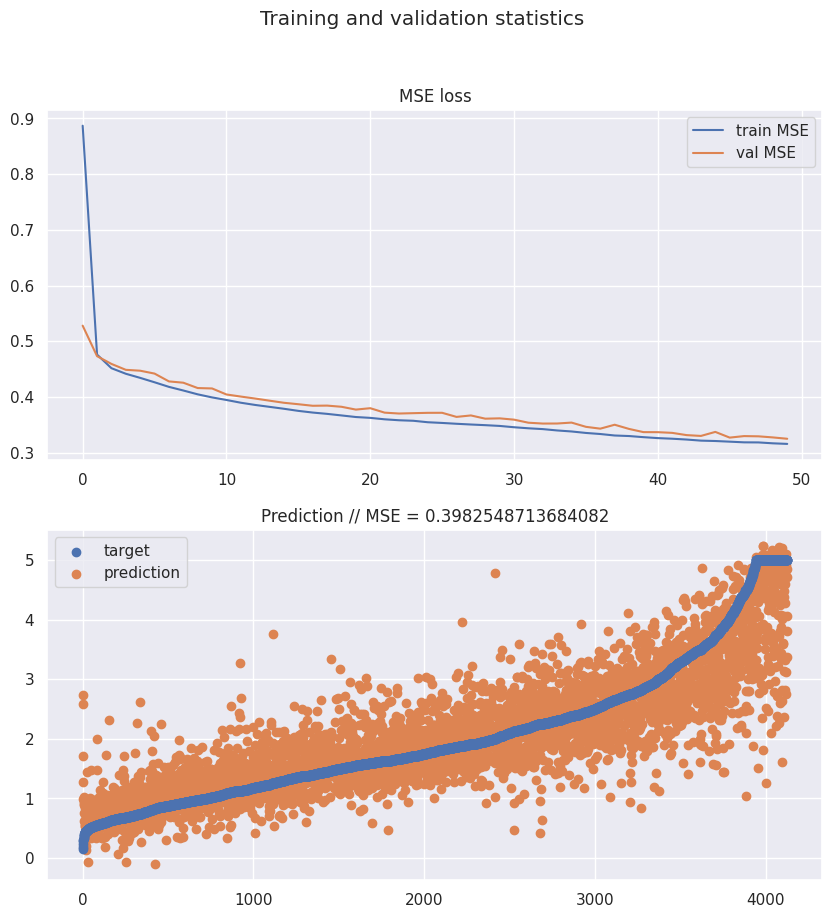

In [21]:
# Execution
print(f"Device: {device}, Learning Rate: {learning_rate}, Epochs: {nb_epochs}")

train_loss, val_loss = train_regressor(
    model=mlp_regression,
    optimizer=optimizer,
    train_loader=train_dataloader,
    valid_loader=val_dataloader,
    nb_epoch=nb_epochs,
    criterion=criterion,
    batch_size=batch_size,
    device=device,
    verbose=verbose,
)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.12: </b>  
Comment the results on : 
* The loss function
* The model error

Can we do better and how?
</div>

<div class="alert alert-block alert-info">
    
<b> Exercise 1.13: </b>  
* Implement a new deeper architecture.
* Set the necessary parameters for the training again and restart the procedure.
* Comment on the new results obtained
</div>

In [22]:
import torch.nn as nn

class MLPDeep(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.layer1 = nn.Linear(in_features, 64)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(64, 64)
        self.activation2 = nn.ReLU()
        self.layer3 = nn.Linear(64, 1)

    def forward(self, x):
        value = self.layer1(x)
        value = self.activation1(value)
        value = self.layer2(value)
        value = self.activation2(value)
        value = self.layer3(value)
        return value

In [23]:
n_features = X_train_t.shape[1]
mlp_deep = MLPDeep(in_features=n_features)
batch_size = 64
num_workers = 12
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
learning_rate = 5e-4 
optimizer = Adam(mlp_regression.parameters(), lr=learning_rate) 
criterion = nn.MSELoss() 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nb_epochs = 50
verbose = True

Device: cpu, Learning Rate: 0.0005, Epochs: 50
--------------------------------------------------------------------------------
 Epoch number: 1, Phase: train, Loss value: 0.3128
 Epoch number: 1, Phase: validation, Loss value: 0.3248
--------------------------------------------------------------------------------
 Epoch number: 2, Phase: train, Loss value: 0.3125
 Epoch number: 2, Phase: validation, Loss value: 0.3247
--------------------------------------------------------------------------------
 Epoch number: 3, Phase: train, Loss value: 0.3122
 Epoch number: 3, Phase: validation, Loss value: 0.3248
--------------------------------------------------------------------------------
 Epoch number: 4, Phase: train, Loss value: 0.3123
 Epoch number: 4, Phase: validation, Loss value: 0.3243
--------------------------------------------------------------------------------
 Epoch number: 5, Phase: train, Loss value: 0.3117
 Epoch number: 5, Phase: validation, Loss value: 0.3245
-------------

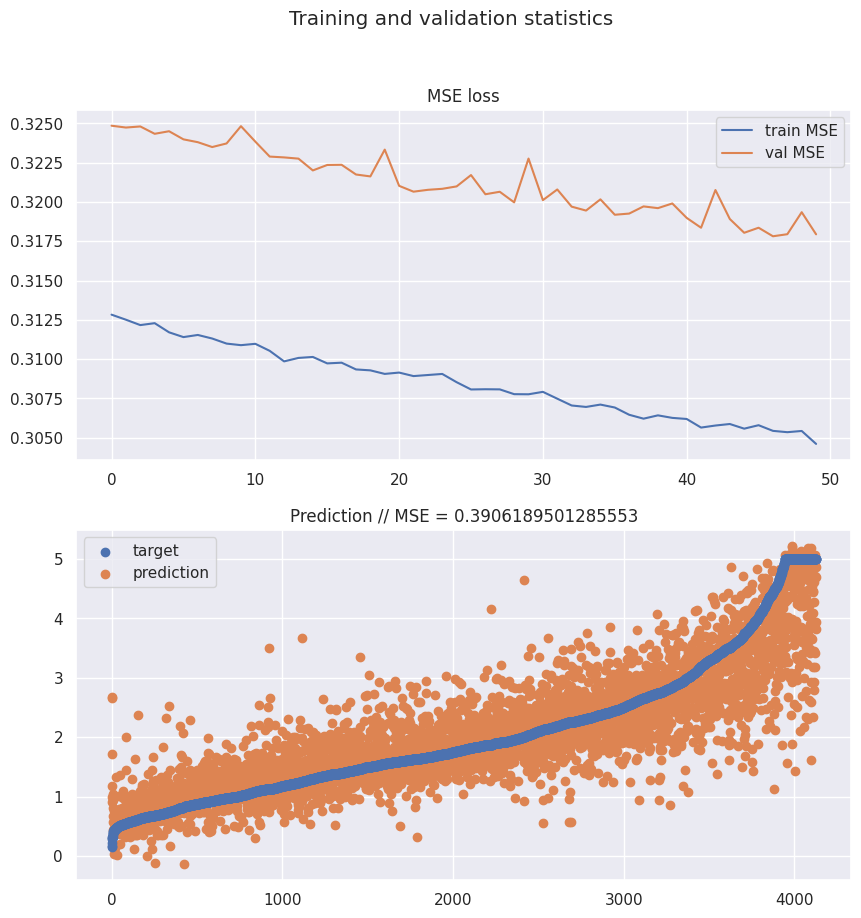

In [24]:
# Execution
print(f"Device: {device}, Learning Rate: {learning_rate}, Epochs: {nb_epochs}")

train_loss, val_loss = train_regressor(
    model=mlp_regression,
    optimizer=optimizer,
    train_loader=train_dataloader,
    valid_loader=val_dataloader,
    nb_epoch=nb_epochs,
    criterion=criterion,
    batch_size=batch_size,
    device=device,
    verbose=verbose,
)

<div class="alert alert-block alert-info">
    
<b> Exercise 1.14: </b>  
* Train the model for 100 epochs and comment on the results obtained.
* Plot the loss function and the model error as a function of the epochs for the training and validation sets.
</div>

--------------------------------------------------------------------------------
 Epoch number: 1, Phase: train, Loss value: 0.3049
 Epoch number: 1, Phase: validation, Loss value: 0.3180
--------------------------------------------------------------------------------
 Epoch number: 2, Phase: train, Loss value: 0.3046
 Epoch number: 2, Phase: validation, Loss value: 0.3174
--------------------------------------------------------------------------------
 Epoch number: 3, Phase: train, Loss value: 0.3047
 Epoch number: 3, Phase: validation, Loss value: 0.3186
--------------------------------------------------------------------------------
 Epoch number: 4, Phase: train, Loss value: 0.3046
 Epoch number: 4, Phase: validation, Loss value: 0.3176
--------------------------------------------------------------------------------
 Epoch number: 5, Phase: train, Loss value: 0.3047
 Epoch number: 5, Phase: validation, Loss value: 0.3172
------------------------------------------------------------

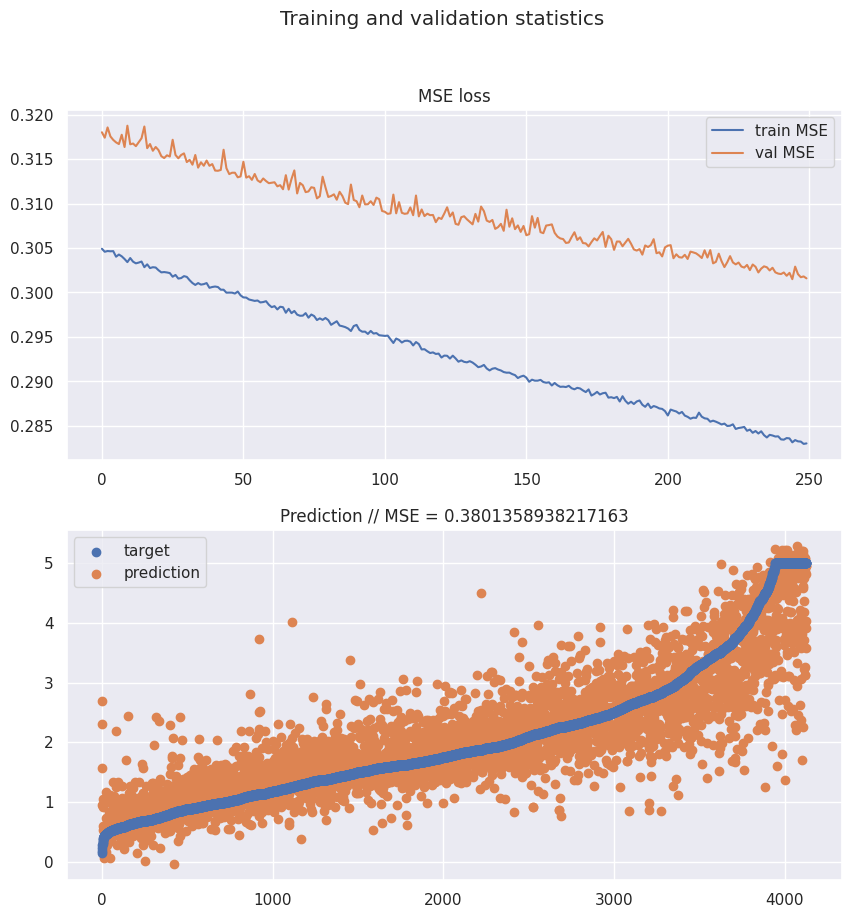

In [25]:
train_loss, val_loss = train_regressor(
    model=mlp_regression,
    optimizer=optimizer,
    train_loader=train_dataloader,
    valid_loader=val_dataloader,
    nb_epoch=250,
    criterion=criterion,
    batch_size=batch_size,
    device=device,
    verbose=verbose,
)

The phenomena of exercise 1.14 is called overfitting.

<div class="alert alert-block alert-info">

<b> Exercise 1.15: </b>   
* Explain in your own words what is overfitting.
* How can we avoid this phenomenon?
</div>

<div class="alert alert-block alert-info">
    
<b> Exercise 1.16: </b>  
* Implement early stopping in the training loop.
* Add some regularization 
* Add weight decay on the optimizer and explain in your own words what is weight decay.
</div>

## Regularization

In the previous cells we just mentionned the word **regularization**, what is it exactly?

1. A machine learning model learns on a training set 
2. We want the model to perform well on a test set it hasn't seen
3. The deeper the model, the greater the chance that it overfits by memorizing patterns that only exist in the training set
4. Regularizing a model means that we make it's life harder  
5. There are many ways to regularize a neural network:
    1. Use more data! The more training data there is, the more the model will focus on general patterns
    2. Penalize the updates made to the weights by the optimizer 
    3. Use dropout
    4. Use batch normalization
    5. Use early stopping
    
![complexity](complexity.png)

# How to choose the architecture of the neural network ?

There are so many choices you can make that it can quickly become overwhelming. Choosing the right pieces of the puzzle is very much an art rather than a science. There is no getting around trying things out. It is thus very important to setup a stable environment for testing and evaluating model choices. You should always start by defining a reliable testing procedure.

Here is some general advice:

1. Start with a very simple model (for example a logistic regression)
2. Add complexity to the model as long as the validation score improves
3. If the model is overfitting (you can detect it by comparing the training and validation scores) then add regularization
4. Last but not least, spend most of your time checking that the data you're using is correct

Here are some more links if you're interested:

- [How to decide neural network architecture? - Data Science exchange](https://datascience.stackexchange.com/questions/20222/how-to-decide-neural-network-architecture)
- [How to choose the number of hidden layers and nodes in a feedforward neural network? - Cross Validated](https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw)